In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
plt.rcdefaults()
fontsize = 14
from matplotlib import font_manager
from matplotlib import rcParams
from matplotlib import rc
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
plt.rcParams['font.serif']=cmfont.get_name()
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.size" : fontsize,
          "text.usetex" : False,
          "mathtext.fontset" : "cm",
          "font.family" : "serif",
          "font.serif" : [cmfont.get_name()]}
plt.rcParams['axes.unicode_minus']=False
plt.rcParams.update(params)


<ipython-input-2-3c413fd5304f>:7: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


In [3]:
def total_mag(b,einst):
    u = b/einst
    mag = (u**2+2)/(u*np.sqrt(u**2+4))
    return mag

def delta_magnit(b,einst):
    mag = total_mag(b,einst)
    delta = -2.5*np.log10(1/mag)
    return delta

def total_defl(b,einst):
    u = b/einst
    defl = einst*u/(u**2+2)
    return defl

In [4]:
einst_rad = 10.0
x_array = np.logspace(-1,4,1000000)
photo_1 = -2.5*np.log10(1-1/x_array)
photo_2 = -2.5*np.log10(1-1/x_array**4)
mag_1 = 1-1/x_array
mag_2 = 1-1/x_array**4
astro_1 = 1/x_array
astro_2 = 1/(x_array)**4

<ipython-input-4-2633a5c6b6f5>:3: RuntimeWarning: invalid value encountered in log10
  photo_1 = -2.5*np.log10(1-1/x_array)
<ipython-input-4-2633a5c6b6f5>:4: RuntimeWarning: invalid value encountered in log10
  photo_2 = -2.5*np.log10(1-1/x_array**4)


In [5]:
mag_array = total_mag(x_array,einst_rad)
defl_array = total_defl(x_array,einst_rad)
delta_array = delta_magnit(x_array,einst_rad)

<ipython-input-6-abeb1717b6ec>:3: RuntimeWarning: invalid value encountered in log10
  photo_1 = -2.5*np.log10(1-1/x_array)
<ipython-input-6-abeb1717b6ec>:4: RuntimeWarning: invalid value encountered in log10
  photo_2 = -2.5*np.log10(1-1/x_array**4)


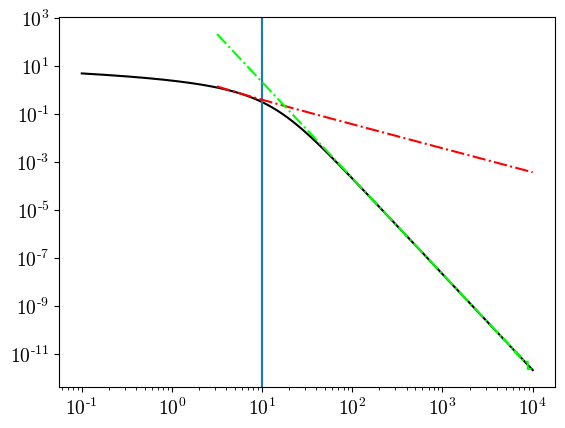

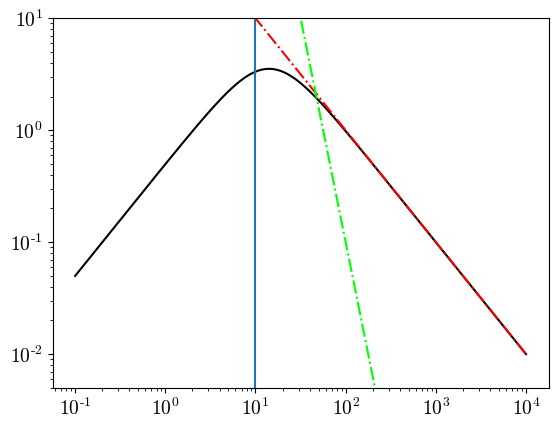

In [6]:
einst_rad = 10.0
x_array = np.logspace(-1,4,1000000)
photo_1 = -2.5*np.log10(1-1/x_array)
photo_2 = -2.5*np.log10(1-1/x_array**4)
astro_1 = 1/x_array
astro_2 = 1/(x_array)**4

mag_array = total_mag(x_array,einst_rad)
defl_array = total_defl(x_array,einst_rad)
delta_array = delta_magnit(x_array,einst_rad)

plt.plot(x_array,delta_array,color='black')
plt.axvline(einst_rad,-100,100)
plt.axvline(einst_rad,-100,100)
plt.plot(x_array[300000:],photo_1[300000:]*3.5,color='red',linestyle='dashdot')
plt.plot(x_array[300000:],photo_2[300000:]*20000,color='lime',linestyle='dashdot')
plt.yscale('log')
plt.xscale('log')
plt.show()
plt.plot(x_array,defl_array,color='black')
plt.axvline(einst_rad,-100,100)
plt.yscale('log')
plt.xscale('log')
plt.ylim(0.5*10**(-2),10**1)
plt.plot(x_array[300000:],astro_1[300000:]*100,color='red',linestyle='dashdot')
plt.plot(x_array[300000:],astro_2[300000:]*10000000,color='lime',linestyle='dashdot')
plt.show()

/share/apps/python/3.8.6/intel/lib/python3.8/site-packages/numpy-1.19.2-py3.8-linux-x86_64.egg/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


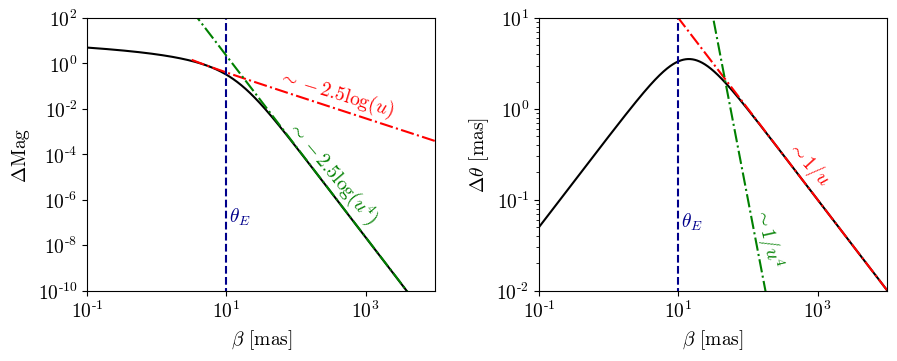

In [7]:
fig, axd = plt.subplot_mosaic([['left','right']],
                              figsize=(9, 3.5), constrained_layout=True)

axd['left'].plot(x_array,delta_array,color='black')
axd['left'].set_xscale('log')
axd['left'].set_yscale('log')
axd['left'].axvline(einst_rad,-100,100,color='darkblue',linestyle='--')
#axd['upper'].spines['bottom'].set_visible(False)
#axd['left'].xaxis.set_ticks([])
axd['left'].set_xlim(x_array[0],x_array[-1])
axd['left'].set_ylim(1e-10,1e2)
#axd['left'].axhline(0.001,-100,100,color='green',linestyle='--')
axd['left'].set_ylabel(r'$\Delta$Mag')
axd['left'].set_xlabel(r'$\beta$ [mas]')
axd['left'].plot(x_array[300000:],photo_1[300000:]*3.5,color='red',linestyle='dashdot')
axd['left'].plot(x_array[300000:],photo_2[300000:]*20000,color='green',linestyle='dashdot')

axd['left'].text(50, 0.005, r'$\sim -2.5\log(u)$',rotation=-17.0,color='red',fontweight='bold')
axd['left'].text(60, 0.0000001, r'$\sim -2.5\log(u^4)$',rotation=-50.0,color='green',fontweight='bold')
axd['left'].text(11, 0.0000001, r'$\theta_E$',rotation=0,color='darkblue',fontweight='bold')

axd['right'].plot(x_array,defl_array,color='black')
axd['right'].set_xscale('log')
axd['right'].set_yscale('log')
axd['right'].axvline(einst_rad,-100,100,color='darkblue',linestyle='--')
#axd['right'].axhline(0.1,-100,1000,color='green',linestyle='--')
axd['right'].set_xlim(x_array[0],x_array[-1])
axd['right'].set_ylim(1e-2,1e1)
axd['right'].set_xlabel(r'$\beta$ [mas]')
axd['right'].set_ylabel(r'$\Delta\theta$ [mas]')
axd['right'].plot(x_array[100000:],astro_1[100000:]*100,color='red',linestyle='dashdot')
axd['right'].plot(x_array[100000:],astro_2[100000:]*10000000,color='green',linestyle='dashdot')

axd['right'].text(300, 0.15, r'$\sim 1/u$',rotation=-47.5,color='red',fontweight='bold')
axd['right'].text(100, 0.02, r'$\sim 1/u^4$',rotation=-77.5,color='green',fontweight='bold')
axd['right'].text(11, 0.05, r'$\theta_E$',rotation=0,color='darkblue',fontweight='bold')

plt.show()

/share/apps/python/3.8.6/intel/lib/python3.8/site-packages/numpy-1.19.2-py3.8-linux-x86_64.egg/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


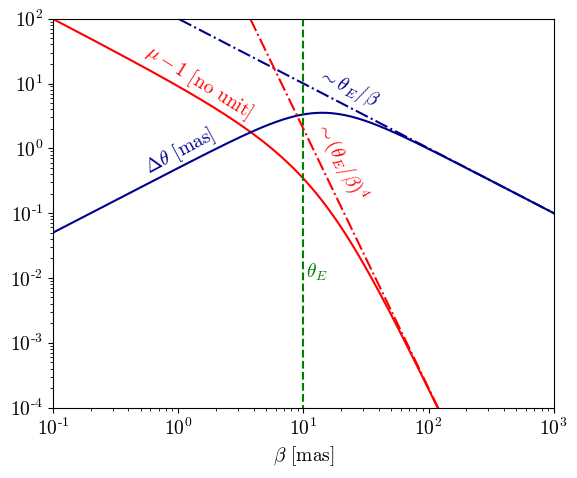

In [37]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [6, 5.0]
plt.rcParams["figure.autolayout"] = True
ax1 = plt.subplot()
ax1.plot(x_array,mag_array-1,color='red')
ax1.set_xscale('log')
ax1.set_yscale('log')
#axd['upper'].spines['bottom'].set_visible(False)
#axd['left'].xaxis.set_ticks([])
ax1.set_xlim(x_array[0],1e3)
ax1.set_ylim(1e-4,1e2)
#axd['left'].axhline(0.001,-100,100,color='green',linestyle='--')
#ax1.set_ylabel(r'$\Delta\mu-1$')
ax1.set_xlabel(r'$\beta$ [mas]')
#ax1.plot(x_array[300000:],photo_1[300000:]*3.5,color='red',linestyle='dashdot')
#ax1.plot(x_array[300000:],mag_2[300000:]*20000,color='green',linestyle='dashdot')
#ax1.text(50, 0.005, r'$\sim -2.5\log(u)$',rotation=-17.0,color='red',fontweight='bold')
#ax1.text(60, 0.0000001, r'$\sim -2.5\log(u^4)$',rotation=-50.0,color='green',fontweight='bold')
ax1.text(10.5, 0.01, r'$\theta_E$',rotation=0,color='green',fontweight='bold')


#ax2 = ax1.twinx()

ax1.plot(x_array,defl_array,color='darkblue')
ax1.axvline(einst_rad,-100,100,color='green',linestyle='--')
#axd['right'].axhline(0.1,-100,1000,color='green',linestyle='--')
ax1.set_xlim(x_array[0],1e3)
ax1.set_ylim(1e-4,1e2)
#ax1.set_xlabel(r'$\beta$ [mas]')
#ax1.set_ylabel(r'$\Delta\theta$ [mas]')
ax1.plot(x_array[100000:],astro_1[100000:]*100,color='darkblue',linestyle='dashdot')
ax1.plot(x_array[100000:],astro_2[100000:]*20000,color='red',linestyle='dashdot')

ax1.text(11, 0.17, r'$\sim (\theta_E/\beta)^4$',rotation=-62,color='red',fontweight='bold')
ax1.text(12, 4.5, r'$\sim \theta_E/\beta$',rotation=-25,color='darkblue',fontweight='bold')
ax1.text(.5, 0.41, r'$\Delta\theta$ [mas]',rotation=28,color='darkblue',fontweight='bold')
ax1.text(.5, 3.0, r'$\mu-1$ [no unit]',rotation=-32,color='red',fontweight='bold')

plt.savefig('/home/mk7976/git/gaiablip/analysis/plotting/astrometry_photometry.pdf',dpi=500)

plt.show()